In [40]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
path = "C:/Users/juanr/Downloads/Covid/sickdata.csv"
df = pd.read_csv(path)

In [42]:
df.describe()

,sick_people
count,22.000000
mean,89.136364
std,110.558020
min,1.000000
25%,13.250000
50%,39.500000
75%,120.250000
max,387.000000


In [43]:
df = df.loc[:,['date','sick_people']]
FMT = '%m/%d/%Y'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("03/03/2020", FMT)).days  )

In [44]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [78]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,1])
fit = curve_fit(logistic_model,x,y,p0=[4,30,100000])

In [79]:
fit

(array([   4.13537187,   26.87806412, 1976.71657791]),
 array([[7.12346303e-02, 8.06683234e-01, 2.74781128e+02],
        [8.06683234e-01, 9.97451036e+00, 3.45499370e+03],
        [2.74781128e+02, 3.45499370e+03, 1.20079133e+06]]))

In [80]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
errors

[0.2668981647430431, 3.1582448231044076, 1095.806247859609]

In [64]:
fit

(array([   4.1353719 ,   26.87806442, 1976.71667862]),
 array([[7.12346971e-02, 8.06683709e-01, 2.74781057e+02],
        [8.06683709e-01, 9.97451236e+00, 3.45499144e+03],
        [2.74781057e+02, 3.45499144e+03, 1.20078952e+06]]))

In [65]:
a = 4.13537588
b = 26.87806442
c = 1976.71667862

In [66]:
sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))
sol

59

In [68]:
def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

exp_fit = curve_fit(exponential_model,x,y,p0=[3.23,0.22,1])

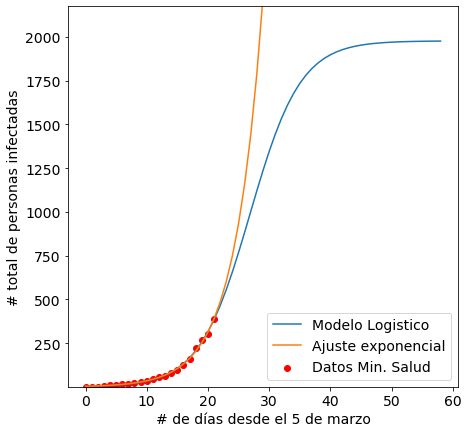

In [76]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Min. Salud",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Modelo Logistico" )
# Predicted exponential curve
plt.plot(x+pred_x, [exponential_model(i,exp_fit[0][0],exp_fit[0][1],exp_fit[0][2]) for i in x+pred_x], label="Ajuste exponencial" )
plt.legend()
plt.xlabel("# de días desde el 5 de marzo")
plt.ylabel("# total de personas infectadas")
plt.ylim((min(y)*0.9,c*1.1))
plt.show()